# Machine learning modules

In [1]:
import pandas as pd
import numpy as np

Importing data from csv file

In [2]:
df =  pd.read_csv('dataset.csv',delimiter=';')
print(df.size)
print(df.isna().any())

33068
Elementary lesion    False
Color                False
Homogene             False
Well_Delimited       False
Reticulated          False
Bourgeonnant         False
Papillomatous        False
Age                   True
Sex                   True
Tobacco               True
Stupefies             True
Alcohol               True
Diagnosis             True
Dysplasia            False
dtype: bool


In [3]:
#Replace NaN elements with 0
df=df.fillna(0) 

In [4]:
df.columns

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex', 'Tobacco',
       'Stupefies', 'Alcohol', 'Diagnosis', 'Dysplasia'],
      dtype='object')

In [5]:
df.values

array([['No loss of substance', 'White', 'No', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'White', 'Yes', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'White', 'Yes', ..., 'No', 'LPB', 'No'],
       ...,
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'GINGIVITE',
        'No'],
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'LPB', 'No']],
      dtype=object)

In [6]:
df['Elementary lesion'].unique() 

array(['No loss of substance', 'Bubble', 'With volume augmentation',
       'With loss of substance', 'No lesion'], dtype=object)

In [7]:
#df['Diagnosis'].unique()

In [8]:
df2=df.copy()
for index in df.columns:
    keys_list=range(0, df[index].unique().size) 
    values_list=list(df[index].unique()) 
    zip_iterator = zip(values_list, keys_list)
    column_dict = dict(zip_iterator)
    df2[index] = [column_dict[index] for index in df2[index]]

In [9]:
df2.describe()

,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,0.801439,1.350127,0.451312,0.502540,0.181626,0.051651,0.048688,27.372989,0.522862,1.552921,0.025826,0.028789,7.304403,0.055038
std,1.160897,1.348512,0.497729,0.500099,0.385617,0.221369,0.215260,18.745113,0.655755,3.695177,0.207264,0.201690,10.646333,0.245971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,2.000000,19.000000,3.000000,2.000000,40.000000,3.000000


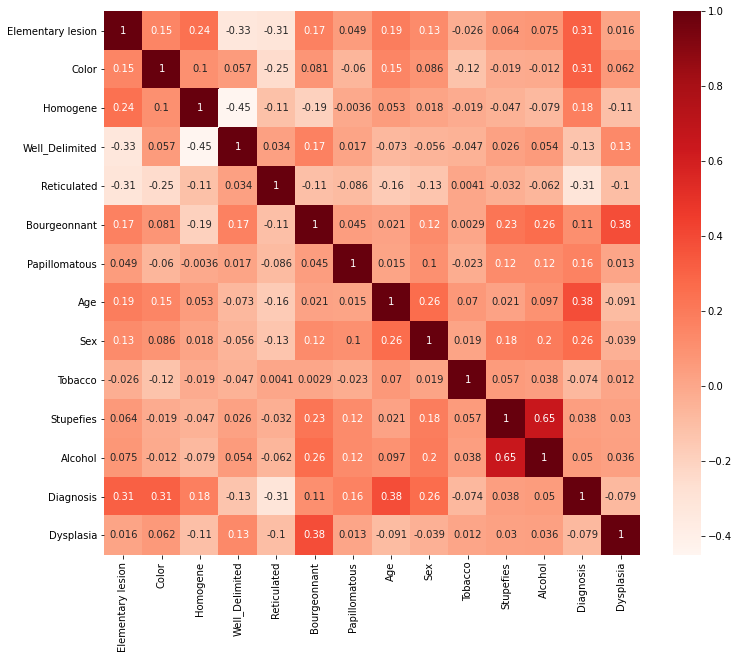

In [11]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#del df2['Well_Delimited']
#Correlation with output variable
cor_target = abs(cor["Diagnosis"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print (relevant_features)

Elementary lesion    0.310201
Color                0.311311
Homogene             0.180843
Well_Delimited       0.129456
Reticulated          0.311836
Bourgeonnant         0.105469
Papillomatous        0.163377
Age                  0.383420
Sex                  0.261788
Diagnosis            1.000000
Name: Diagnosis, dtype: float64


In [13]:
X=df2[df2.columns[0:-2]] 
Y1=df2[df2.columns[-2]] 
Y2=df2[df2.columns[-1]] 

In [14]:
X.columns

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex', 'Tobacco',
       'Stupefies', 'Alcohol'],
      dtype='object')

In [15]:
import statsmodels.api as sm
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.OLS(Y1,X_1).fit()
print(model.pvalues)
zip_OLS = zip(X.columns, model.pvalues.values[1:])
dict_OLS = dict(zip_OLS)
print(dict_OLS)

const                1.379119e-01
Elementary lesion    2.386772e-09
Color                6.809759e-27
Homogene             5.452954e-06
Well_Delimited       3.031511e-02
Reticulated          1.542303e-13
Bourgeonnant         1.001630e-03
Papillomatous        2.342908e-16
Age                  9.629388e-50
Sex                  1.452912e-11
Tobacco              2.281122e-04
Stupefies            8.115612e-01
Alcohol              7.033420e-02
dtype: float64
{'Elementary lesion': 2.3867724761158426e-09, 'Color': 6.809758754798336e-27, 'Homogene': 5.452953515832617e-06, 'Well_Delimited': 0.030315109871037717, 'Reticulated': 1.5423025527869633e-13, 'Bourgeonnant': 0.001001629770657372, 'Papillomatous': 2.342908138952612e-16, 'Age': 9.629388084747812e-50, 'Sex': 1.4529121773608975e-11, 'Tobacco': 0.00022811224269083261, 'Stupefies': 0.8115612089584805, 'Alcohol': 0.0703341965015876}


In [16]:
weak_correlation = dict()
p_max=0.05
for (key, value) in dict_OLS.items(): 
    if value > p_max:
        weak_correlation[key] = value
print(weak_correlation)

{'Stupefies': 0.8115612089584805, 'Alcohol': 0.0703341965015876}


In [17]:
for (key, value) in weak_correlation.items():
    del X[key]
print(X.columns)

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex',
       'Tobacco'],
      dtype='object')


In [18]:
from sklearn.decomposition import PCA
pca = PCA()

In [19]:
pca.fit(X)

PCA()

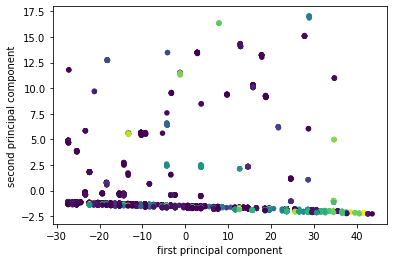

In [20]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y1, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
# Y1 as a target
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y1,
                                                    test_size=0.25,
                                                    random_state=1234)
knn.fit(X_train, y_train);

In [47]:
knn.score(X_test, y_test)

0.8747884940778342

In [48]:
# Y2 as a target
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y2,
                                                    test_size=0.25,
                                                    random_state=1234)

knn.fit(X_train, y_train);

In [49]:
knn.score(X_test, y_test)

0.988155668358714